In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.tree import plot_tree
from dataset_functions import *
#branch loda
dataset_path = "../dataset/mlcourse-dota2-win-prediction/train_features.csv"

In [12]:
df, target = get_dataset()
df, target = playerstats_teamheros_transform(df,target)
#df, target = playerstats_playerheros_transform(df,target)
#df, target = teamstats_teamheros_transform(df,target)

Features:  Index(['match_id_hash', 'game_time', 'game_mode', 'lobby_type',
       'objectives_len', 'chat_len', 'r1_hero_id', 'r1_kills', 'r1_deaths',
       'r1_assists',
       ...
       'd5_stuns', 'd5_creeps_stacked', 'd5_camps_stacked', 'd5_rune_pickups',
       'd5_firstblood_claimed', 'd5_teamfight_participation',
       'd5_towers_killed', 'd5_roshans_killed', 'd5_obs_placed',
       'd5_sen_placed'],
      dtype='object', length=246) 

Target Columns:  Index(['match_id_hash', 'game_time', 'radiant_win', 'duration',
       'time_remaining', 'next_roshan_team'],
      dtype='object') 

Filtering Df:  (game_mode == 2 or game_mode == 22) and game_time > 0 

Dropped:  ['lobby_type', 'chat_len', 'game_mode'] 

Dataframe Shape:  (32153, 243) 

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 

Dataframe Shape: (32153, 463) 

NaN Count:  0 

(32153, 6)


In [13]:
win = target["radiant_win"].astype(int)
X = np.array(df.values)
Y = np.array(win)

print(X.shape)
print(Y.shape)

(32153, 462)
(32153,)


In [4]:
np.random.seed(seed=10)

X_train,X_test,Y_train,Y_test = train_test_split(df,win,test_size=0.2)

In [5]:
feature_selector = RandomForestClassifier(max_depth=10,class_weight="balanced")

feature_selector.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10)

In [6]:
Y_pred = feature_selector.predict(X_test)

acc = accuracy_score(Y_test,Y_pred)
auc = roc_auc_score(Y_test,Y_pred)

print("Accouracy ",acc)
print("Auc",auc)

feature_importance = {
    name: value 
    for name,value in zip(feature_selector.feature_names_in_,feature_selector.feature_importances_)
}

print(feature_importance)

feature_importance = dict(reversed(sorted(feature_importance.items(), key=lambda item: item[1])))
print(feature_importance)
feature_names = list(feature_importance.keys())[:10]
print(list(feature_importance.keys())[-10:])
print(feature_names)
print(list(feature_importance.keys()))
#print(feature_importance["d_58"])
#print(feature_importance["d_68"])
#print(feature_importance["r_32"])
#print(feature_importance["d_32"]) 
#print(feature_importance["r2_y"])
#print(feature_importance["d_towers_killed"])
#print(feature_importance["objectives_len"])
#print(feature_importance["d_teamfight_participation"])

Accouracy  0.7017571139791634
Auc 0.6982876210330871
{'game_time': 0.00370957040291158, 'objectives_len': 0.0032449451380340715, 'r1_kills': 0.00415898235193386, 'r1_deaths': 0.00824107271416928, 'r1_assists': 0.004610514506739013, 'r1_denies': 0.0028828900360139274, 'r1_gold': 0.0053717461981516775, 'r1_lh': 0.0034271614232687835, 'r1_xp': 0.00452605324193289, 'r1_health': 0.00398275791780584, 'r1_max_health': 0.004508467426481361, 'r1_max_mana': 0.003812258158183527, 'r1_level': 0.0019511792626952654, 'r1_x': 0.018485320162430187, 'r1_y': 0.01692846892312366, 'r1_stuns': 0.0021766013837701027, 'r1_creeps_stacked': 0.0005870151287939343, 'r1_camps_stacked': 0.0005394093631375628, 'r1_rune_pickups': 0.0030025179057975894, 'r1_firstblood_claimed': 0.00021905724834024882, 'r1_teamfight_participation': 0.0035640601421317096, 'r1_towers_killed': 0.0018344911213605253, 'r1_roshans_killed': 8.793492823163485e-05, 'r1_obs_placed': 0.0011054243177903442, 'r1_sen_placed': 0.0008022579806903581,

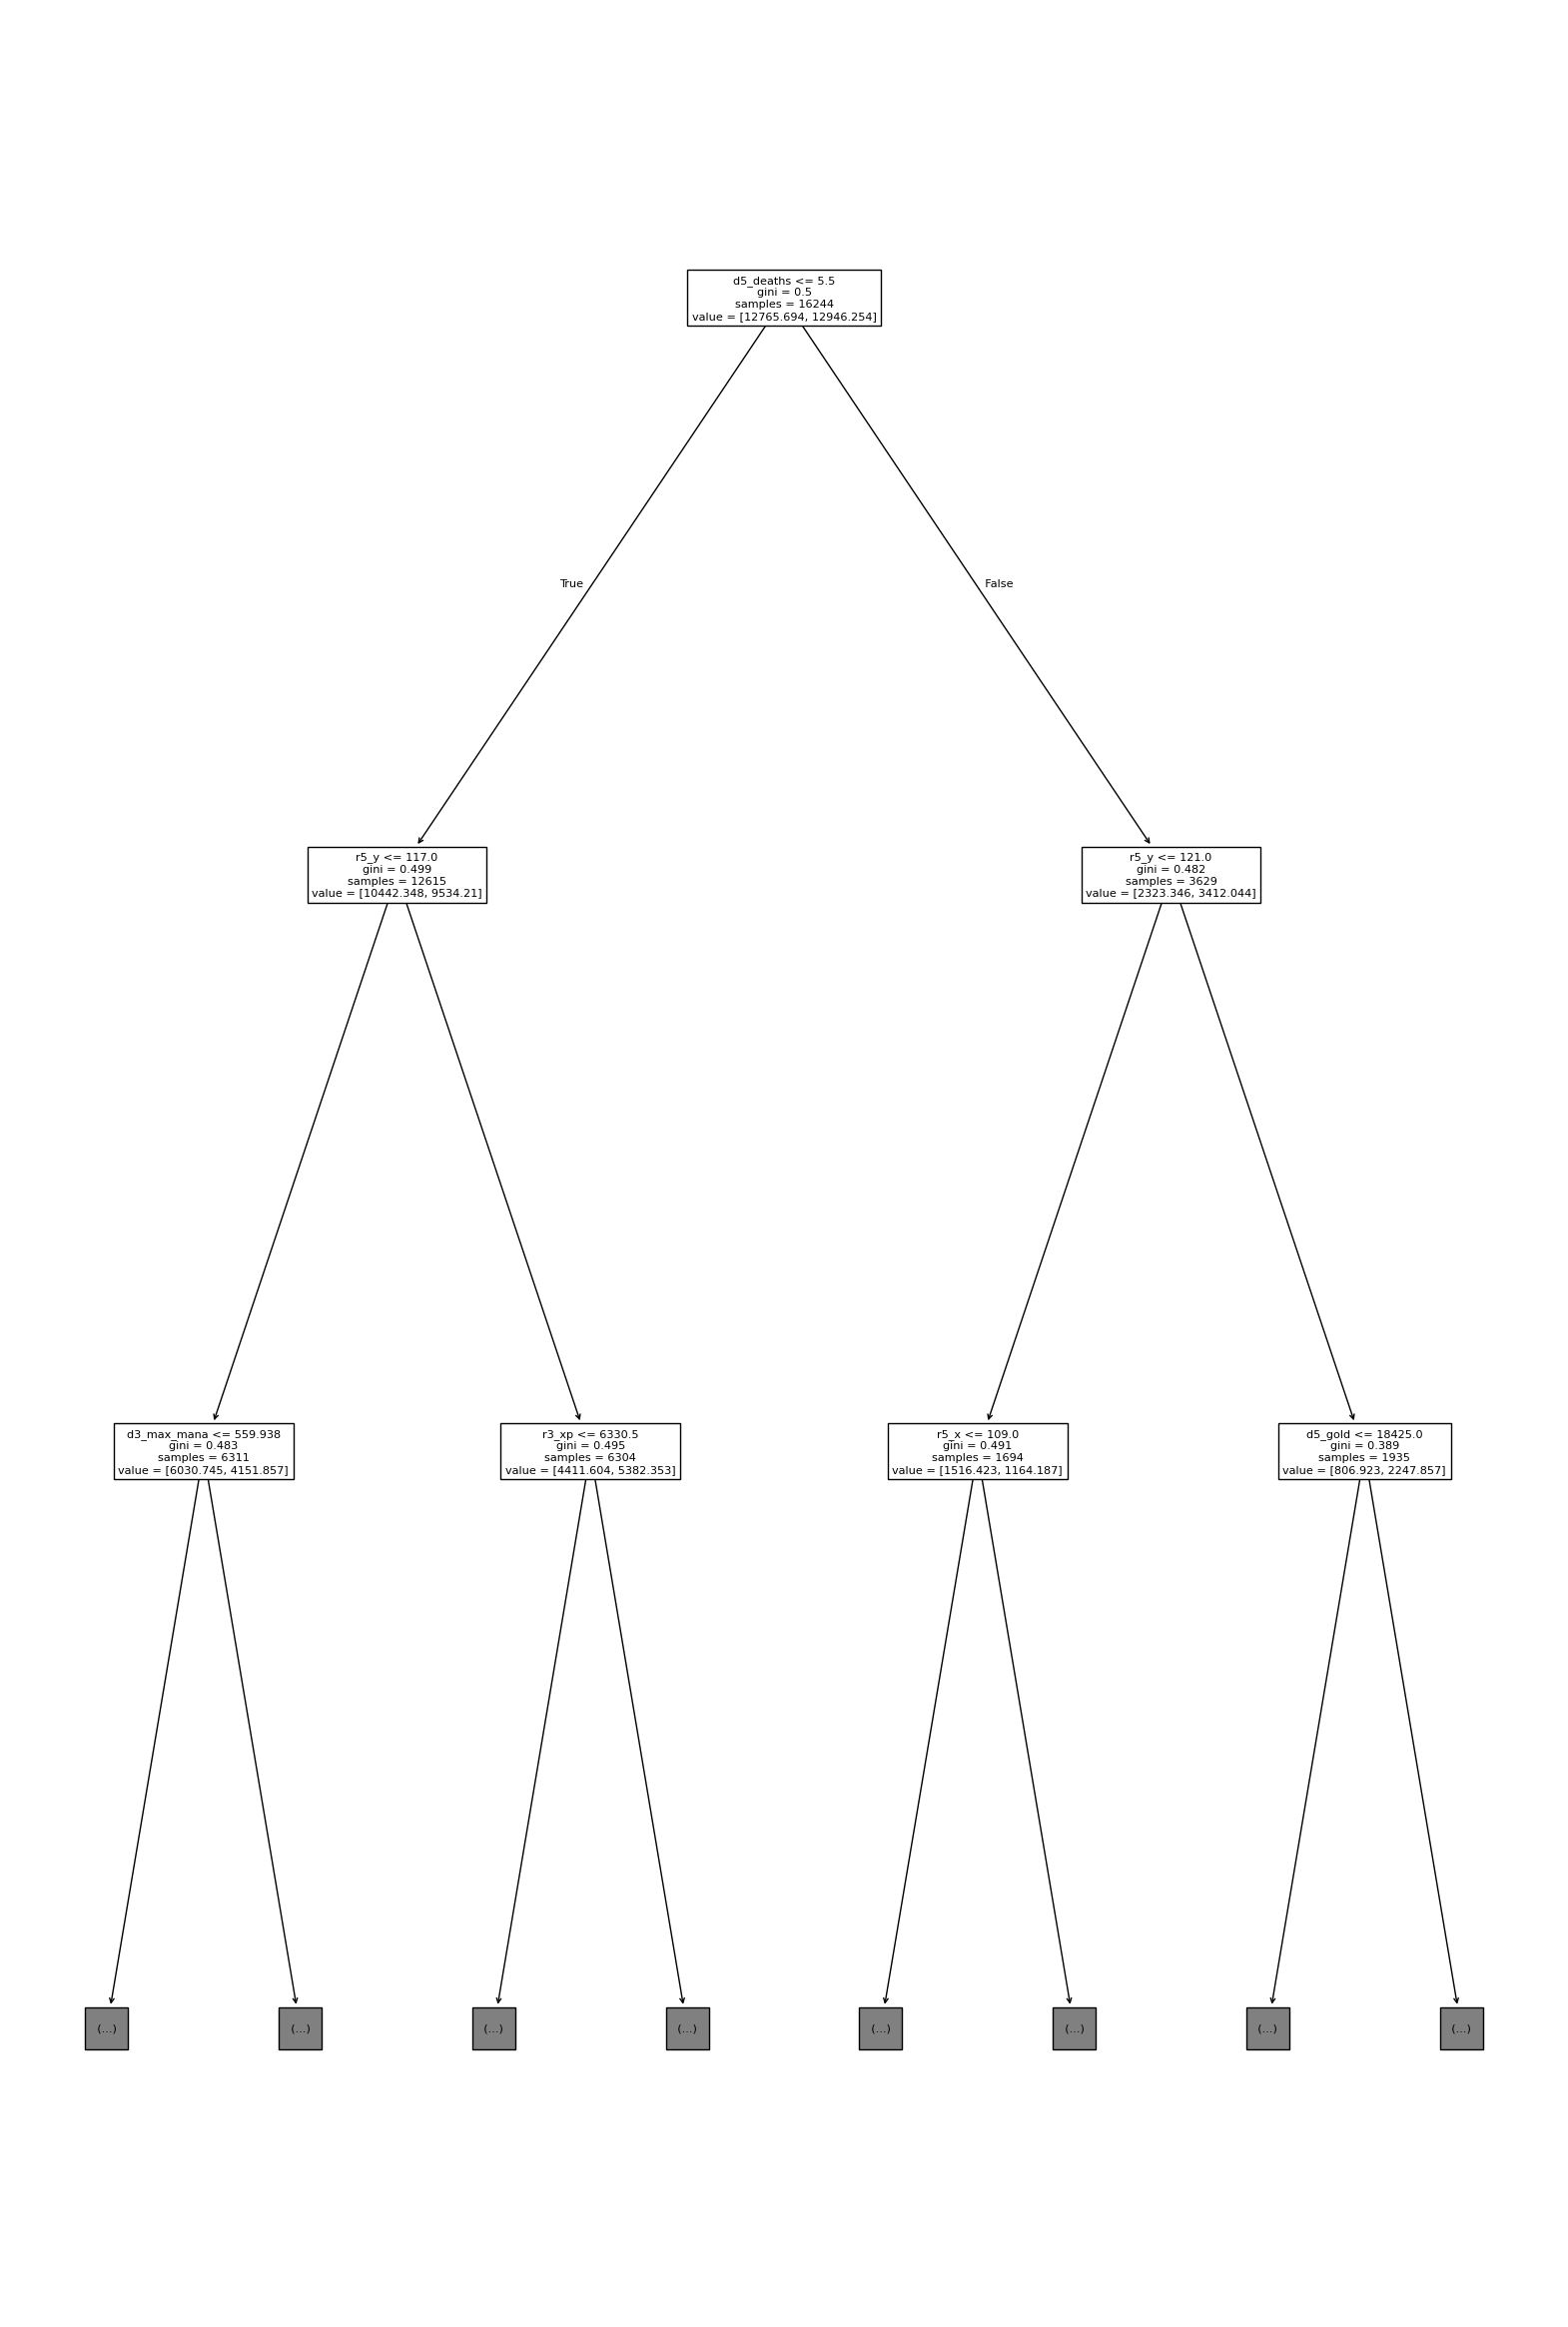

In [7]:
tree = feature_selector.estimators_[1]

plt.figure(figsize=(20,30))
plot_tree(tree,max_depth=2,feature_names=df.columns)
plt.show()